In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/astenast/Desktop/02806 Social data analysis and visualization/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [3]:
df

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160948,16054122161030,160541221,61030,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Monday,07/04/2016,16:08,TENDERLOIN,NONE,...,18.0,NaN,18.0,6.0,2.0,1.0,1.0,NaN,NaN,20.0
2160949,17044968764085,170449687,64085,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Thursday,06/01/2017,18:42,BAYVIEW,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
2160950,17047243406133,170472434,6133,LARCENY/THEFT,GRAND THEFT PURSESNATCH,Friday,06/09/2017,19:10,NORTHERN,NONE,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,22.0
2160951,17095059363010,170950593,63010,WARRANTS,WARRANT ARREST,Wednesday,11/22/2017,14:30,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0


Simple Statistics
- Report the total number of crimes in the dataset

In [4]:
df['PdId'].count()

2160953

There are 2,160,953 million crimes recorded from 2013 to May of 2018.

- List the various categories of the crimes

In [5]:
df['Category'].unique()

# print(len(df['Category'].unique())) There are 38 different crimes

# index = list(df.groupby(by='Category').count().index)
# index

array(['VEHICLE THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'ASSAULT', 'NON-CRIMINAL', 'BURGLARY',
       'LOITERING', 'ROBBERY', 'SUSPICIOUS OCC', 'FORGERY/COUNTERFEITING',
       'DRUG/NARCOTIC', 'TRESPASS', 'VANDALISM', 'WARRANTS',
       'SECONDARY CODES', 'WEAPON LAWS', 'MISSING PERSON', 'DRUNKENNESS',
       'STOLEN PROPERTY', 'RECOVERED VEHICLE', 'PROSTITUTION', 'ARSON',
       'EMBEZZLEMENT', 'LIQUOR LAWS', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING', 'SUICIDE', 'BRIBERY',
       'FAMILY OFFENSES', 'SEX OFFENSES, NON FORCIBLE', 'BAD CHECKS',
       'GAMBLING', 'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype=object)

- List the number of crimes in each category

In [6]:
crimes = df.groupby(by='Category').PdId.count().sort_values(ascending=False)
crimes

Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 303027
NON-CRIMINAL                   236937
ASSAULT                        191384
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117875
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79740
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
SEX OFFENSES, FORCIBLE          10876
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4966
LIQUOR LAWS                      3941
ARS

- **Exercise: The types of crime and their popularity over time. The first field we'll dig into is the column "Category".**

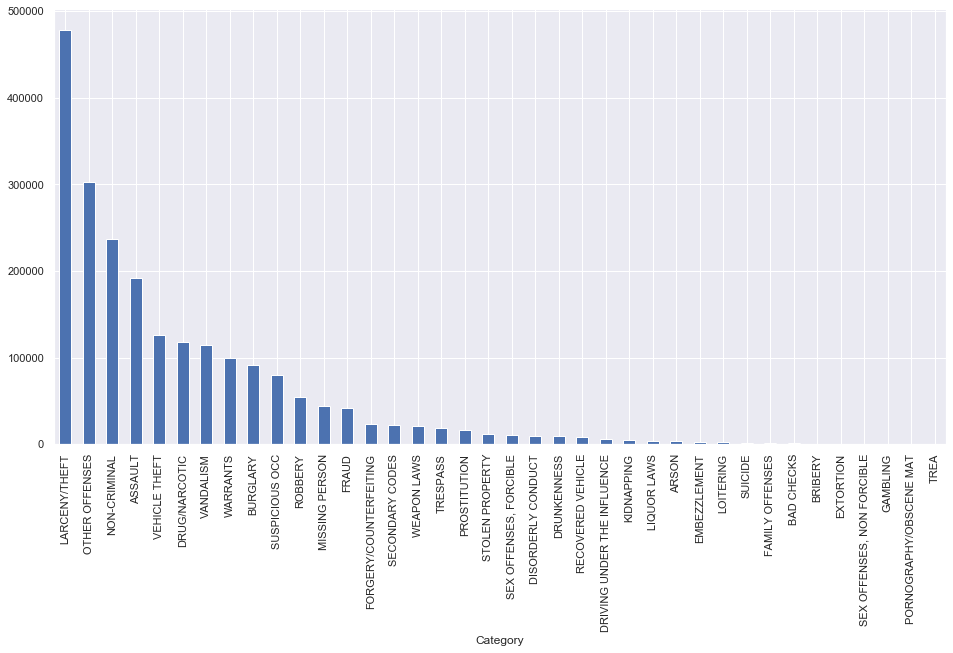

In [7]:
sns.set()
fig, ax = plt.subplots(figsize=(16, 8))
crimes.plot(kind='bar')

- Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2017 (since we don't have full data for 2018). What's the average number of crimes per year?

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
per = df.Date.dt.to_period("Y")
peryear = df.groupby(per).count()[:-1]
peryear

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
Date,,,,,,,,,,,,,,,,,,,,,
2003,145073,145073,145073,145073,145073,145073,145073,145073,145073,145073,...,36650,31776,37002,37044,144969,22905,22890,33666,8042,144631
2004,144323,144323,144323,144323,144323,144323,144323,144323,144323,144323,...,35912,30436,36302,35636,144205,22029,22111,32224,7338,143888
2005,138807,138807,138807,138807,138807,138807,138807,138807,138807,138807,...,33367,27949,33803,33049,138679,20386,20399,29835,6221,138298
2006,133726,133726,133726,133726,133726,133726,133726,133726,133726,133726,...,34090,28445,34383,33285,133671,20696,20738,30176,6873,133367
2007,133601,133601,133601,133601,133601,133601,133601,133601,133601,133601,...,36947,30010,37340,36027,133564,23890,23779,31576,7609,133225
2008,137113,137113,137113,137113,137113,137113,137113,137113,137113,137113,...,38712,31835,39132,38340,137044,25817,25715,33455,7737,136734
2009,136218,136218,136218,136218,136218,136218,136218,136218,136218,136218,...,40438,31817,40695,39480,136145,26890,26797,33372,8158,135842
2010,129750,129750,129750,129750,129750,129750,129750,129750,129750,129750,...,35917,29132,36160,35963,129696,22904,22851,30621,6795,129434
2011,128563,128563,128563,128563,128563,128563,128563,128563,128563,128563,...,34690,28440,34830,34851,128488,21225,21092,30035,6692,128257


In [10]:
print('The average number of crimes per year is:', peryear.PdId.mean()) 

The average number of crimes per year is: 141007.46666666667


In [11]:
# df.groupby([per, 'Category']).count()

- Focus crimes

In [12]:
df['Year'] = df.Date.dt.to_period("Y")

In [19]:
index_names = df[df['Year'] == '2018'].index 
print(index_names)
# drop these given row 
# indexes from dataFrame 
df.drop(index_names, inplace = True) 

Int64Index([1122888, 1132675, 1135067, 1143129, 1143294, 1147260, 1147530,
            1152426, 1162462, 1171589,
            ...
            2141800, 2141906, 2141957, 2142029, 2142044, 2142167, 2142168,
            2142175, 2142415, 2142507],
           dtype='int64', length=45841)


In [20]:
# df2 = df[df.Year != 2018]

In [21]:
df.groupby(['Category', 'Year']).count()

PdId  IncidntNum  Incident Code  Descript  DayOfWeek  Date  \
Category    Year                                                               
ARSON       2003   286         286            286       286        286   286   
            2004   274         274            274       274        274   274   
            2005   229         229            229       229        229   229   
            2006   240         240            240       240        240   240   
            2007   241         241            241       241        241   241   
...                ...         ...            ...       ...        ...   ...   
WEAPON LAWS 2013  1435        1435           1435      1435       1435  1435   
            2014  1478        1478           1478      1478       1478  1478   
            2015  1590        1590           1590      1590       1590  1590   
            2016  1591        1591           1591      1591       1591  1591   
            2017  1644        1644           1644      1644       1644  1644   

                  Time  PdDistrict  Resolution  Address  ...  \
Category    Year                                         ...   
ARSON       2003   286         286         286      286  ...   
            2004   274         274         274      274  ...   
            2005   229         229         229      229  ...   
            2006   240         240         240      240  ...   
            2007   241         241         241      241  ...   
...                ...         ...         ...      ...  ...   
WEAPON LAWS 2013  1435        1435        1435     1435  ...   
            2014  1478        1478        1478     1478  ...   
            2015  1590        1590        1590     1590  ...   
            2016  1591        1591        1591     1591  ...   
            2017  1644        1644        1644     1644  ...   

                  Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
Category    Year                                                                
ARSON       2003                                  37                       26   
            2004                                  29                       30   
            2005                                  23                       29   
            2006                                  43                       29   
            2007                                  33                       24   
...                                              ...                      ...   
WEAPON LAWS 2013                                 452                      405   
            2014                                 405                      404   
            2015                                 496                      482   
            2016                                 433                      438   
            2017                                 453                      458   

                  Fix It Zones as of 2018-02-07 2 2  \
Category    Year                                      
ARSON       2003                                 40   
            2004                                 32   
            2005                                 25   
            2006                                 45   
            2007                                 33   
...                                             ...   
WEAPON LAWS 2013                                458   
            2014                                412   
            2015                                502   
            2016                                447   
            2017                                461   

                  CBD, BID and GBD Boundaries as of 2017 2 2  \
Category    Year                                               
ARSON       2003                                          20   
            2004                                          35   
            2005                                          25   
            2006                                      

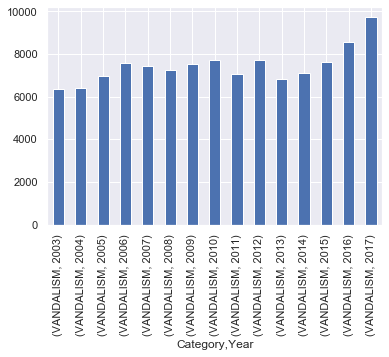

In [36]:
df.groupby(['Category', 'Year']).count().filter(like = 'VANDALISM', axis=0)['PdId'].plot(kind='bar')

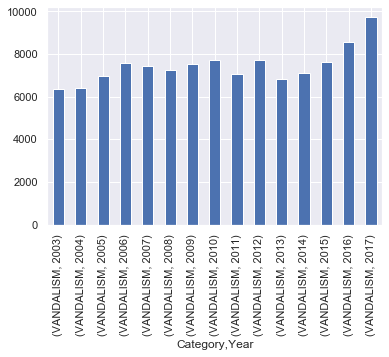

In [37]:
df.groupby(['Category', 'Year']).count().filter(like = 'VANDALISM', axis=0)['PdId'].plot(kind='bar')

In [17]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

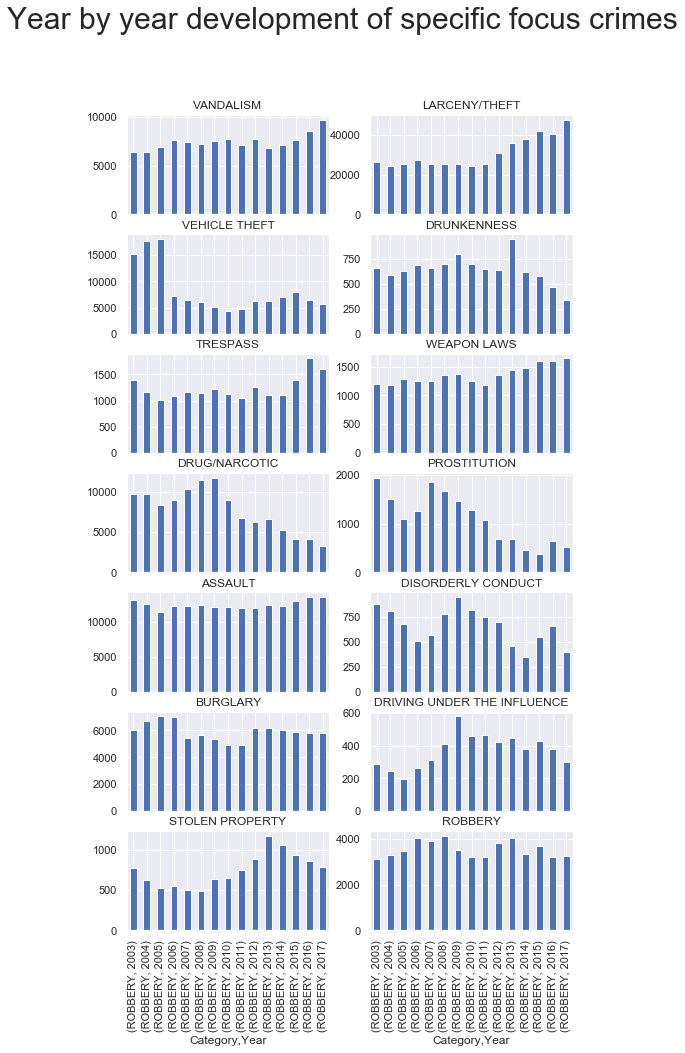

In [34]:
fig, axarr = plt.subplots(7, 2, figsize=(8, 15), sharex=True)
plt.suptitle('Year by year development of specific focus crimes', fontsize=30)

i = 0
j = 0

for crime in focuscrimes:
    dataframe = pd.DataFrame(df.groupby(['Category', 'Year']).count().filter(like = crime, axis=0)['PdId'])
    #x = df.plot(ax=axarr[i,j], title=part, legend=False, style=linestyle, color='dodgerblue')
    x = dataframe.plot(kind= 'bar', ax=axarr[i,j], title=crime, legend=False)
    #axarr[i, j].set_title(company[1], fontdict={'fontsize': 15, 'fontweight': 8})
    
    if j==1:
        j=0
        i=i+1
    else:
        j+=1